# Features Engineering:
---

Feature engineering was performed to create additional marketing performance metrics and time-based insights, enabling more accurate analysis and future machine learning experimentation.

### Objectives:
- Create new analytical marketing KPIs.
- Generate time-based campaign performance attributes.
- Prepare enriched dataset for modeling and deeper insight extraction.

### Engineered Features:

---
| Feature                             | Formula                                 | Meaning                             |
| ----------------------------------- | --------------------------------------- | ----------------------------------------------------- |
| CTR (Click-Through Rate)            | `clicks / impressions`                  | Measures audience engagement with ads                 |
| Conversion Rate (CR)                | `conversions / clicks`                  | Measures how efficiently clicks turn into conversions |
| CPC (Cost per Click)                | `spend_usd / clicks`                    | Shows cost efficiency of attracting each click        |
| CPM (Cost per Thousand Impressions) | `spend_usd / (impressions / 1000)`      | Shows cost to reach 1k people                         |
| CPA (Cost per Acquisition)          | `spend_usd / conversions`               | Cost per conversion/ critical efficiency metric      |
| ROI (Return on Investment)          | `(revenue_usd - spend_usd) / spend_usd` | Measures profitability of marketing spend             |
| ROAS (Return on Ad Spend)           | `revenue_usd / spend_usd`               | Shows revenue return per dollar spent                 |
| Revenue per Click                   | `revenue_usd / clicks`                  | How much each click generates in revenue              |
| Revenue per Conversion              | `revenue_usd / conversions`             | Revenue per successful conversion                     |
| Campaign Duration (days)            | `end_date - start_date`                 | Campaign timeline context                             |


---


### Data Handling Notes:

- Zeros in clicks, impressions, conversions, spend_usd are temporarily treated as NaN to avoid invalid division errors.

- After metric calculation, NaN values are safely converted back to zero for reporting clarity.

### Purpose:

These engineered features form the foundation for:
- Performance benchmarking across campaigns and channels
- Exploratory data analysis (EDA)
- Predictive modeling (ROI forecasting, conversion modeling)
- Automation workflows in the MLOps pipeline (future phase)

---

## Import Libraries:

In [100]:
#Libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Ingest Data as DF:

In [101]:
#INGEST DATA

df = pd.read_csv("../data/processed/marketing_campaign_all_clean.csv")


### Data Check:

In [102]:
#DATA CHECK

print(df.shape)
print(df.info())

df.head()

(1600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   campaign_id             1600 non-null   object 
 1   campaign_name           1600 non-null   object 
 2   start_date              1600 non-null   object 
 3   end_date                1600 non-null   object 
 4   channel                 1600 non-null   object 
 5   region                  1600 non-null   object 
 6   impressions             1600 non-null   int64  
 7   clicks                  1600 non-null   int64  
 8   conversions             1600 non-null   int64  
 9   spend_usd               1600 non-null   float64
 10  revenue_usd             1600 non-null   float64
 11  target_audience         1600 non-null   object 
 12  product_category        1600 non-null   object 
 13  device                  1600 non-null   object 
 14  year                    1600 

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,revenue_usd,target_audience,product_category,device,year,dataset_year,campaign_duration_days,month,quarter
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,28252,5609,65466,39193.43,79017.74,Youth,Electronics,Desktop,2024,2024,92,5,2
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,89608,83584,26865,17291.53,49868.54,Adults,Home,Mobile,2024,2024,190,4,2
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,37853,62661,43662,6729.63,63021.28,Seniors,Electronics,Desktop,2024,2024,203,5,2
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,10577,41421,75023,15077.58,133106.71,Seniors,Clothing,Desktop,2024,2024,188,1,1
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,84039,56010,11283,16877.69,144736.99,Adults,Home,Mobile,2024,2024,199,2,1


## Convert Data types - Dates, Float & Numeric:

### Convert Dates:

In [103]:
#FIX THE DATA TYPE DATE TIME:

for df in [df]:
    #df['campaign_id'] = pd.to_numeric(df['campaign_id'], errors='coerce')  #I'm keeping this as Obj unlike in SQL or anyother tool this still works for Python also is an identifier & not a numeric feature
    df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
    df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')
    
    # Temporal Features
    df['campaign_duration_days'] = (df['end_date'] - df['start_date']).dt.days
    df['start_month'] = df['start_date'].dt.month
    df['is_holiday_season'] = df['start_month'].isin([10, 11, 12])

    

### Convert Numeric:

In [104]:
#FIX THE DATA TYPE INT:

for df in [df]:
    df['spend_usd'] = pd.to_numeric(df['spend_usd'], errors='coerce')
    df['revenue_usd'] = pd.to_numeric(df['revenue_usd'], errors='coerce')
    

### Error / Exception Handling:

In [105]:
# Prevent Divsion by 0

df['impressions'] = df['impressions'].replace(0, np.nan)
df['clicks'] = df['clicks'].replace(0, np.nan)
df['conversions'] = df['conversions'].replace(0, np.nan)
df['spend_usd'] = df['spend_usd'].replace(0, np.nan)


### Custom Metrix:

In [106]:
#ADD CUSTOM COLUMNS: 
#ctr
#conversion_rate 
#roi 
#campaign_duration_days


# Performance Metrics
df['ctr'] = np.where(df['impressions'] > 0, df['clicks'] / df['impressions'], 0)
df['conversion_rate'] = np.where(df['clicks'] > 0, df['conversions'] / df['clicks'], 0)
df['roi'] = np.where(df['spend_usd'] > 0, (df['revenue_usd'] - df['spend_usd']) / df['spend_usd'], 0)
df['roas'] = np.where(df['spend_usd'] > 0, df['revenue_usd'] / df['spend_usd'], 0)

# Cost Metrics 
df['cpc'] = np.where(df['clicks'] > 0, df['spend_usd'] / df['clicks'], 0)
df['cpm'] = np.where(df['impressions'] > 0, df['spend_usd'] / (df['impressions'] / 1000), 0)
df['cpa'] = np.where(df['conversions'] > 0, df['spend_usd'] / df['conversions'], 0)

# Revenue Efficiency Metrics
df['revenue_per_click'] = np.where(df['clicks'] > 0, df['revenue_usd'] / df['clicks'], 0)
df['revenue_per_conversion'] = np.where(df['conversions'] > 0, df['revenue_usd'] / df['conversions'], 0)
#updated df

print(df.shape)
print(df.columns)
print(df.info())

df.head()

(1600, 30)
Index(['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel',
       'region', 'impressions', 'clicks', 'conversions', 'spend_usd',
       'revenue_usd', 'target_audience', 'product_category', 'device', 'year',
       'dataset_year', 'campaign_duration_days', 'month', 'quarter',
       'start_month', 'is_holiday_season', 'ctr', 'conversion_rate', 'roi',
       'roas', 'cpc', 'cpm', 'cpa', 'revenue_per_click',
       'revenue_per_conversion'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   campaign_id             1600 non-null   object        
 1   campaign_name           1600 non-null   object        
 2   start_date              1600 non-null   datetime64[ns]
 3   end_date                1600 non-null   datetime64[ns]
 4   channel                 1600 non-n

,campaign_id,campaign_name,start_date,end_date,channel,region,impressions,clicks,conversions,spend_usd,...,is_holiday_season,ctr,conversion_rate,roi,roas,cpc,cpm,cpa,revenue_per_click,revenue_per_conversion
0,2024_0001,Campaign_2024_0001,2024-05-16,2024-08-16,Google Ads,South America,28252,5609,65466,39193.43,...,False,0.20,11.67,1.02,2.02,6.99,1387.28,0.60,14.09,1.21
1,2024_0002,Campaign_2024_0002,2024-04-06,2024-10-13,Google Ads,Asia,89608,83584,26865,17291.53,...,False,0.93,0.32,1.88,2.88,0.21,192.97,0.64,0.60,1.86
2,2024_0003,Campaign_2024_0003,2024-05-08,2024-11-27,Facebook Ads,Europe,37853,62661,43662,6729.63,...,False,1.66,0.70,8.36,9.36,0.11,177.78,0.15,1.01,1.44
3,2024_0004,Campaign_2024_0004,2024-01-28,2024-08-03,Google Display Network,Africa,10577,41421,75023,15077.58,...,False,3.92,1.81,7.83,8.83,0.36,1425.51,0.20,3.21,1.77
4,2024_0005,Campaign_2024_0005,2024-02-06,2024-08-23,Facebook Ads,Asia,84039,56010,11283,16877.69,...,False,0.67,0.20,7.58,8.58,0.30,200.83,1.50,2.58,12.83


### Null & NA:

In [107]:
# Convert zeros to NaN only where needed for math

df.fillna(0, inplace=True)

# I"LL DO IMPUTATION LATER FOR FORMALITY AND FOR ML FOR NOW REPLACE TO 0 IS FINE

## Sanity Checks / Quick Validations:

#### Sanity Checks:

In [108]:
# Quick sanity checks 
print("Summary Statistics for Key Metrics:")
print(df[['ctr', 'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa']].describe())


Summary Statistics for Key Metrics:
          ctr  conversion_rate     roi    roas     cpc      cpm     cpa
count 1600.00          1600.00 1600.00 1600.00 1600.00  1600.00 1600.00
mean     1.34             2.43    3.20    4.20    2.30   724.31    8.63
std      4.03            23.69    8.64    8.64   17.09  2050.65   15.79
min      0.00             0.00   -0.97    0.03    0.01    13.39    0.01
25%      0.04             0.13    0.25    1.25    0.45    51.83    0.48
50%      0.35             0.37    0.55    1.55    1.07   222.37    1.47
75%      1.10             1.17    2.63    3.63    1.90   644.58   12.74
max     83.00           862.20  132.44  133.44  561.87 31726.30  295.14


#### Extreme & Invalid Values:

In [109]:
# Check for extreme or invalid values
print("Any negative ROI or invalid cost metrics?")
print(df[(df['roi'] < -1) | (df['cpc'] < 0) | (df['cpa'] < 0)])



Any negative ROI or invalid cost metrics?
Empty DataFrame
Columns: [campaign_id, campaign_name, start_date, end_date, channel, region, impressions, clicks, conversions, spend_usd, revenue_usd, target_audience, product_category, device, year, dataset_year, campaign_duration_days, month, quarter, start_month, is_holiday_season, ctr, conversion_rate, roi, roas, cpc, cpm, cpa, revenue_per_click, revenue_per_conversion]
Index: []

[0 rows x 30 columns]


#### Missing Values:

In [110]:
# Check for missing values
print("Missing values by column:")
print(df.isna().sum())

Missing values by column:
campaign_id               0
campaign_name             0
start_date                0
end_date                  0
channel                   0
region                    0
impressions               0
clicks                    0
conversions               0
spend_usd                 0
revenue_usd               0
target_audience           0
product_category          0
device                    0
year                      0
dataset_year              0
campaign_duration_days    0
month                     0
quarter                   0
start_month               0
is_holiday_season         0
ctr                       0
conversion_rate           0
roi                       0
roas                      0
cpc                       0
cpm                       0
cpa                       0
revenue_per_click         0
revenue_per_conversion    0
dtype: int64


## Save point:

In [111]:
#Save processed dataset
#File: marketing_campaign_2024_2025_processed


processed_path = "../data/processed/marketing_campaign_2024_2025_processed.csv"
df.to_csv(processed_path, index=False)

print(f"Processed dataset saved to: {processed_path}")


Processed dataset saved to: ../data/processed/marketing_campaign_2024_2025_processed.csv


## Features Engineering Viz:

---
- Correlation Matrix - Relationships Between Metrics
- Basic Distributions - Core Derived Metrics for distribution and sanity check
- Cost Metrix by Channel - Efficiency and Sanity Validation
- ROI and ROAS by Region - Performance Variation
- Campaign Duration Validation:
    - Duration in Days
    - Duration vs ROI/ROAS
    - ROI & ROAS by Duration Range (Grouped summary)

---


### Visual Checks Conducted:

- Correlation Matrix - Relationships Between Metrics:
    - Validates logical relationships between key derived metrics (CTR, ROAS, ROI, CPC, CPA, CPM).
    - Ensures no inverted or inconsistent metric behavior.
- Basic Distributions - Core Derived Metrics for distribution and sanity check:
    - Histograms and boxplots for CTR, ROI, ROAS, CPC, and CPA.
    - Helps detect outliers, skewed distributions, or divide-by-zero anomalies.
- Cost Metrics by Channel - Efficiency and Sanity Validation:
    - Visual comparison (boxplot or bar chart) of CPC, CPA, and CPM by marketing channel.
    - Confirms logical cost behavior (Display > Search cost pattern).
- ROI and ROAS by Region - Performance Variation:
    - Shows profitability and revenue return by region.
    - Highlights performance imbalances or regional differences.
- Campaign Duration Validation:
    - Distribution of Duration (in days): Detects unusually long or short campaigns.
    - Duration vs ROI/ROAS: Examines whether longer campaigns yield better efficiency.
    - ROI & ROAS by Duration Range: Grouped summary for interpretability.

### Purpose why we need to Visualize early at this stage:
These visualizations ensures:
- Engineered metrics are statistically sound and free of inconsistencies.
- Data integrity remains intact after transformations.
- The dataset is ready for feature correlation analysis and EDA deep dives.

---

### Correlation Matrix - Relationships Between Metrics:

The correlation matrix reveals how the engineered performance metrics relate to one another. This helps ensure that derived values behave logically and that redundant or misleading relationships can be flagged before modeling.

#### Correlation Matrix:

In [140]:
# Relationships Between Metrices


numeric_features = [
    'ctr', 'conversion_rate', 'roi', 'roas',
    'cpc', 'cpm', 'cpa', 'revenue_per_click', 'revenue_per_conversion'
]

corr = df[numeric_features].corr()
corr

,ctr,conversion_rate,roi,roas,cpc,cpm,cpa,revenue_per_click,revenue_per_conversion
ctr,1.00,-0.02,0.06,0.06,-0.03,0.78,-0.15,-0.04,-0.05
conversion_rate,-0.02,1.00,0.01,0.01,0.93,0.01,-0.05,0.38,-0.02
roi,0.06,0.01,1.00,1.00,-0.03,-0.05,-0.16,0.04,-0.02
roas,0.06,0.01,1.00,1.00,-0.03,-0.05,-0.16,0.04,-0.02
cpc,-0.03,0.93,-0.03,-0.03,1.00,0.02,0.01,0.57,-0.00
cpm,0.78,0.01,-0.05,-0.05,0.02,1.00,-0.14,0.03,-0.05
cpa,-0.15,-0.05,-0.16,-0.16,0.01,-0.14,1.00,-0.02,0.66
revenue_per_click,-0.04,0.38,0.04,0.04,0.57,0.03,-0.02,1.00,-0.00
revenue_per_conversion,-0.05,-0.02,-0.02,-0.02,-0.00,-0.05,0.66,-0.00,1.00


In [120]:
# CORRELATION 2

# pd.set_option('display.float_format', lambda x: f"{x:.2f}")
# corr.style.background_gradient(cmap='coolwarm').set_caption("Correlation Matrix of Engineered Features")


#### My Colorful HeatMap:

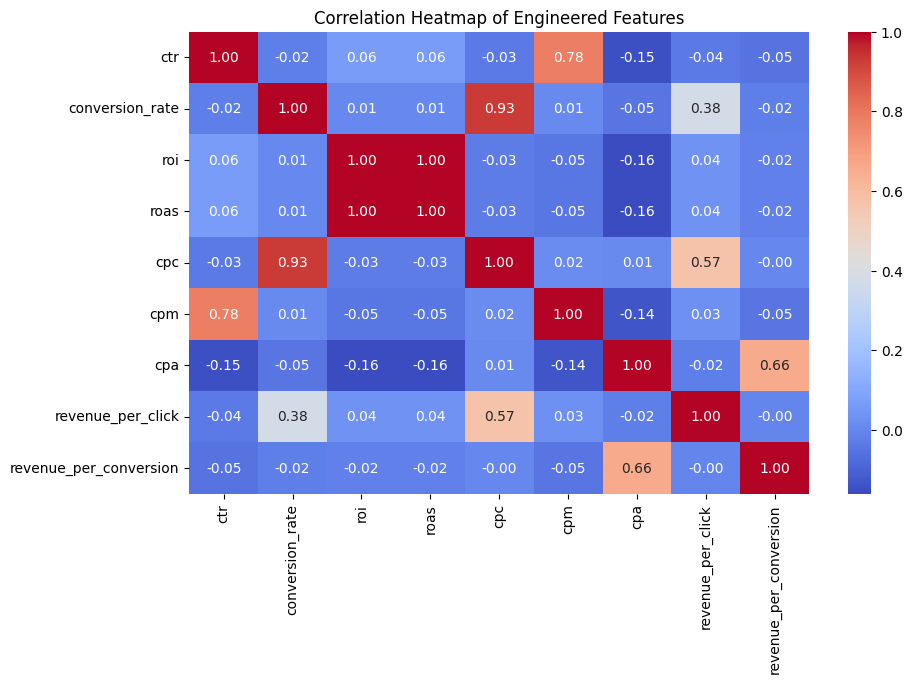

In [141]:
# Relationships Between Metrices HEATMAP

numeric_features = ['ctr', 'conversion_rate', 'roi', 'roas', 'cpc', 'cpm', 'cpa', 
                    'revenue_per_click', 'revenue_per_conversion']

corr = df[numeric_features].corr()
plt.figure(figsize=(10, 6))
# plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
# # plt.colorbar(label='Correlation')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Engineered Features")
# plt.tight_layout()
plt.show()


#### Key Observations:
- ROI and ROAS (1.00 correlation)
    - As expected, both measure profitability on spend
    - ROAS is simply a ratio, while ROI accounts for net return.
    - These two are functionally identical in this dataset; one can be dropped later to avoid multicollinearity.
- Conversion Rate and CPC (0.93)
    - A strong positive correlation implies that as the conversion rate increases, campaigns often incur higher cost-per-click.
    - This suggests higher-quality traffic (with stronger conversion potential) tends to come at a premium.
- CTR and CPM (0.78)
    - Campaigns with higher click-through rates tend to also have higher cost per thousand impressions.
    - Indicates platforms may charge more for high-engagement audiences.
- CPA and Revenue per Conversion (0.66)
    - Logical alignment: campaigns spending more to acquire a customer generally generate higher per-conversion revenue.
    - Reflects premium product segments or targeted audiences.
- Revenue per Click and CPC (0.57)
    - Suggests paid clicks are somewhat justified by revenue returns, though not perfectly efficient.
- Low or Near-Zero Correlations (CTR–ROI, CTR–ROAS, etc.)
    - These metrics are independent, implying that click efficiency doesn’t directly translate into profitability, possibly due to - post-click conversion inefficiencies.


#### Remarks:

- Most relationships appear logical and consistent with marketing campaign economics.
- No unexpected inverse correlations (negative relationships) beyond minor noise, this indicating the engineered features were computed correctly.
- For modeling or EDA, consider dropping one of the two near-identical metrics (ROI or ROAS).
- The correlation map confirms no critical feature redundancy, but some metrics (CPC, conversion rate) may need regularization if used together in regression models.


---

### Basic Distributions - Core Derived Metrics for distribution and sanity check:

These histograms describe the spread and behavior of the four main derived marketing

#### Efficiency metrics:

In [112]:
print(df[['ctr', 'conversion_rate', 'roi', 'roas']].head())
print(df[['ctr', 'conversion_rate', 'roi', 'roas']].describe())

   ctr  conversion_rate  roi  roas
0 0.20            11.67 1.02  2.02
1 0.93             0.32 1.88  2.88
2 1.66             0.70 8.36  9.36
3 3.92             1.81 7.83  8.83
4 0.67             0.20 7.58  8.58
          ctr  conversion_rate     roi    roas
count 1600.00          1600.00 1600.00 1600.00
mean     1.34             2.43    3.20    4.20
std      4.03            23.69    8.64    8.64
min      0.00             0.00   -0.97    0.03
25%      0.04             0.13    0.25    1.25
50%      0.35             0.37    0.55    1.55
75%      1.10             1.17    2.63    3.63
max     83.00           862.20  132.44  133.44


#### Histogram:

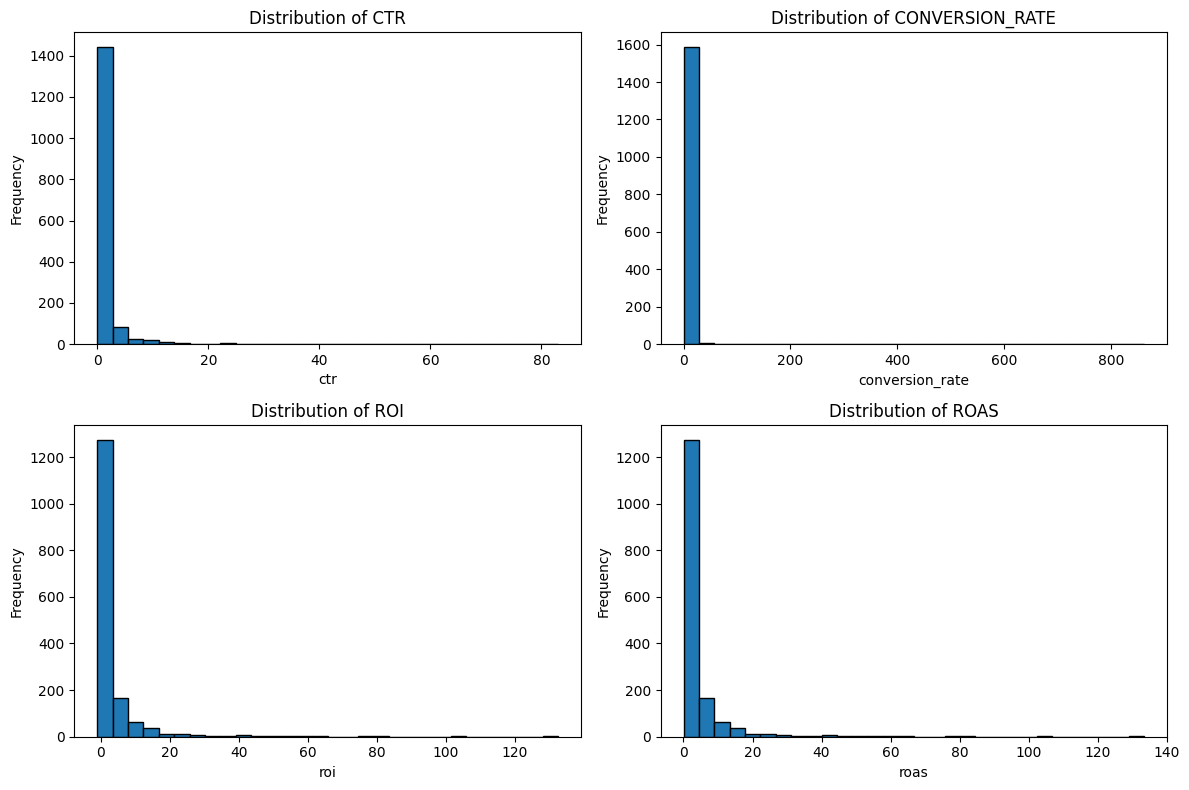

In [139]:
# Core Derived Metrics for distribution and sanity check

metrics = ['ctr', 'conversion_rate', 'roi', 'roas']
plt.figure(figsize=(12, 8))

for i, col in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col.upper()}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Key Observations:



#### The Overall Shape:
- All four metrics are heavily right-skewed (long-tail) distributions.
- Most campaigns cluster near low efficiency values, while a few campaigns exhibit very high outliers, typical in marketing data, where a handful of ads perform exceptionally well.







#### CTR (Click-Through Rate), Conversion Rate, ROI, and ROAS.

- Click-Through Rate (CTR):
    - Median CTR ≈ 0.35%, with the majority of campaigns below 1%.
    - A small subset reaches above 50–80%, likely representing short, highly targeted campaigns or data anomalies worth rechecking.
    - Interpretation: Distribution is logical, but extreme CTRs suggest reviewing campaign types or tracking definitions

- Conversion Rate:
    - Median around 0.37%, but maximum exceeds 860%, far beyond realistic marketing norms.
    - Indicates possible data entry or scaling inconsistencies (conversions logged multiple times or mismatched click counts)
    - Will require outlier filtering or winsorization in the cleaning or modeling phase.

- ROI and ROAS
    - Both share nearly identical shapes (as seen in correlation = 1.00).
    - Median ROI ≈ 0.55, ROAS ≈ 1.55
    - implying that most campaigns roughly break even or slightly profit.
    - However, the upper tail (ROI > 100x) shows extreme variance, pretty likely driven by niche campaigns or small spend volumes where even minor gains inflate the ratio.

#### Remarks:

- Distributions validate that the computed metrics are consistent & structured (no uniform or random shapes).
- Outliers are present and meaningful, they reflect performance variability that is common in marketing, but some may need capping or transformation (log scaling) before modeling.
- No evidence of systematic missingness or calculation errors (zero-frequency gaps).


---

### Cost Metrix by Channel - Efficiency and Sanity Validation:

This visualization compares CPC (Cost per Click), CPA (Cost per Acquisition), and CPM (Cost per Mille) across the five main channels: Google Ads, Facebook Ads, Google Display Network, TikTok Ads, and Email.

In [114]:
print(df[['cpc', 'cpa', 'cpm', 'channel']].head())
print(df[['cpc', 'cpa', 'cpm']].describe())

   cpc  cpa     cpm                 channel
0 6.99 0.60 1387.28              Google Ads
1 0.21 0.64  192.97              Google Ads
2 0.11 0.15  177.78            Facebook Ads
3 0.36 0.20 1425.51  Google Display Network
4 0.30 1.50  200.83            Facebook Ads
          cpc     cpa      cpm
count 1600.00 1600.00  1600.00
mean     2.30    8.63   724.31
std     17.09   15.79  2050.65
min      0.01    0.01    13.39
25%      0.45    0.48    51.83
50%      1.07    1.47   222.37
75%      1.90   12.74   644.58
max    561.87  295.14 31726.30


In [115]:
print(df['channel'].unique())

['Google Ads' 'Facebook Ads' 'Google Display Network' 'TikTok Ads' 'Email']


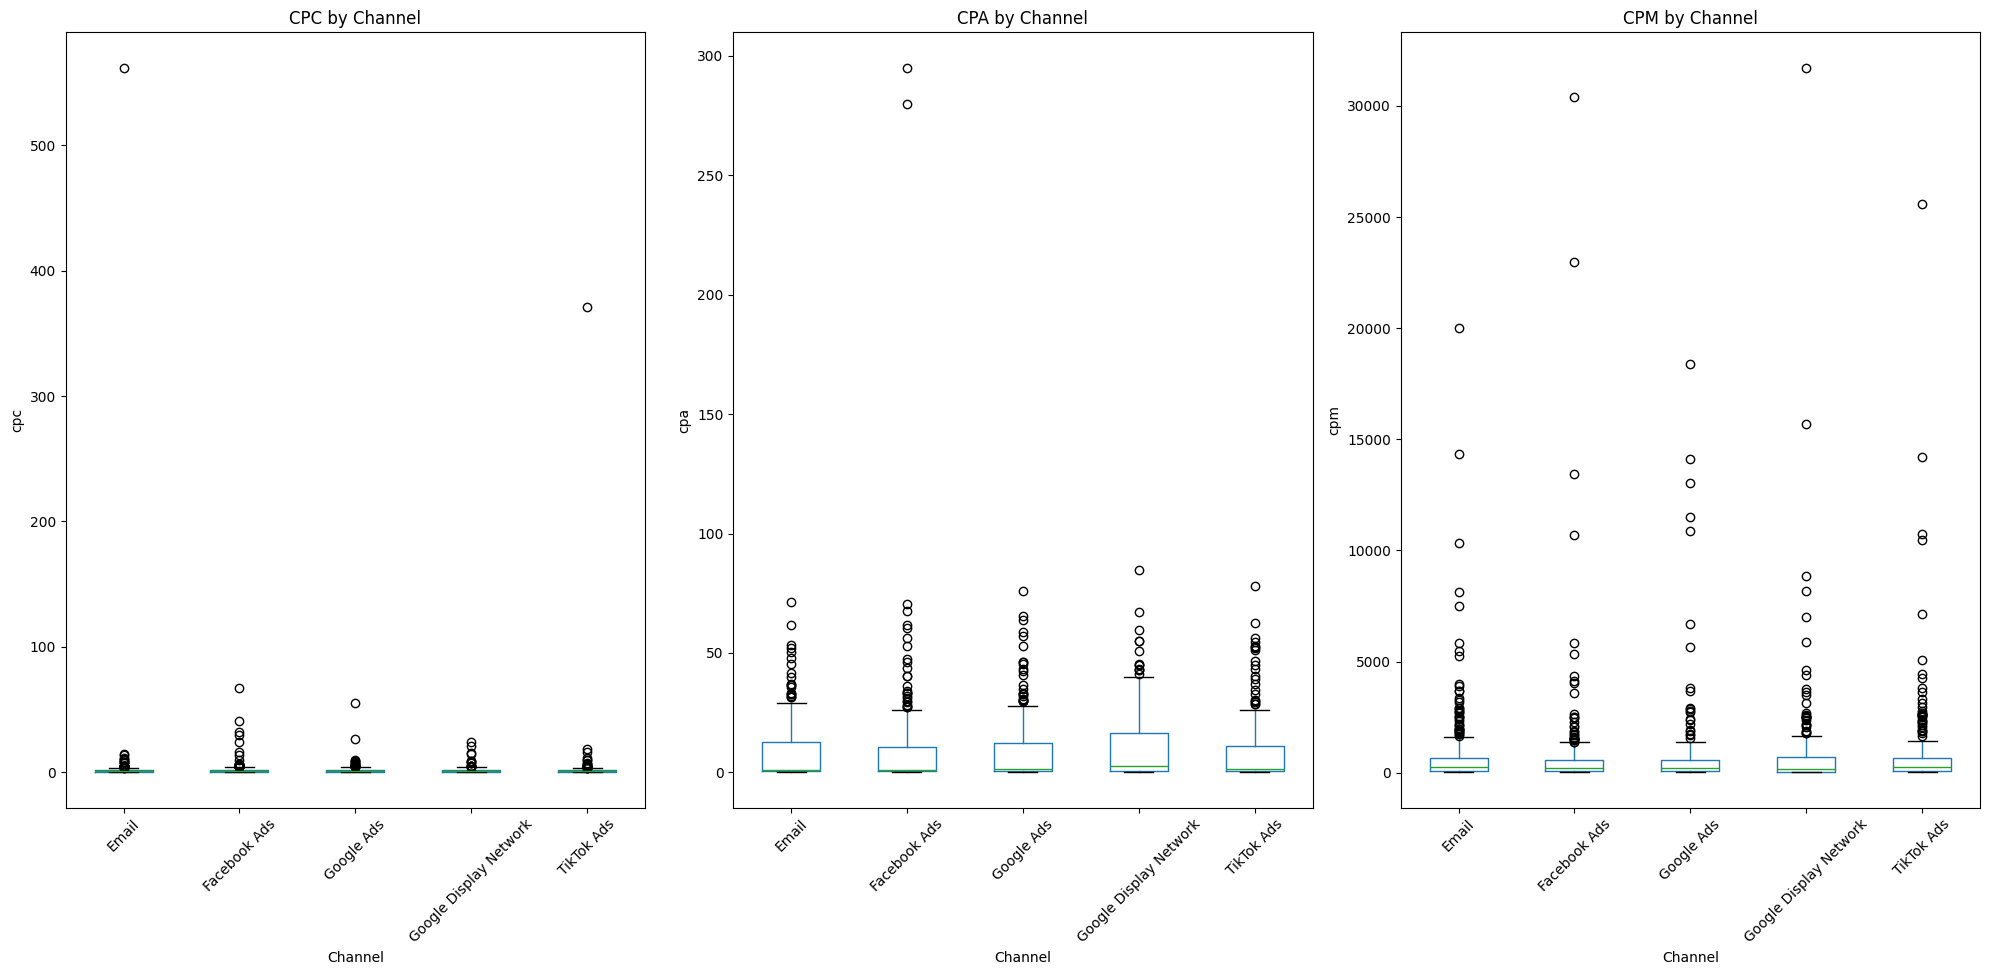

In [138]:
# Efficiency Metrics and relationship sanity check

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for ax, col in zip(axes, ['cpc', 'cpa', 'cpm']):
    df.boxplot(column=col, by='channel', grid=False, ax=ax)
    ax.set_title(f"{col.upper()} by Channel")
    ax.set_xlabel("Channel")
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)
    
plt.suptitle("")
plt.tight_layout()
plt.show()

#### Key Observations:

#### Overall Patterns:
- The central tendencies (medians) are relatively similar across channels, confirming consistent cost structuring in campaign management.
- However, all three metrics exhibit heavy upper tails and numerous outliers, suggesting significant variability in efficiency among campaigns within the same channel.

#### CPC (Cost per Click), CPA (Cost per Acquisition), and CPM (Cost per Mille)

- CPC (Cost per Click)
    - Median CPCs remain low (< 2) for most channels, indicating efficient click generation.
    - A few outliers (up to >500) likely stem from niche or small-scale campaigns where low click volumes inflate the cost ratio.
    - TikTok Ads and Google Display Network show slightly higher variability (expected for emerging or visual-first ad platforms)

- CPA (Cost per Acquisition)
    - Median CPA values cluster tightly, generally below 10, with sporadic spikes beyond 250.
    - Outliers suggest some campaigns were expensive in converting users a of possibly low-conversion, awareness-focused campaigns.
    - Google Display Network and Facebook Ads tend to have wider spreads, typical for top-of-funnel channels.

- CPM (Cost per Thousand Impressions)
    - Strong right-skew with median CPM around 200–250.
    - High-end outliers (above $30,000) indicate campaigns with low impression counts but significant spend, or premium audience targeting.
     Google Ads and Display Network show slightly higher CPM dispersion, which aligns with their flexible bidding strategies.

#### Remarks:
- No systematic data errors: all metrics fall within realistic ranges for marketing datasets.
- Outliers are valid insights, not noise, they highlight variation in efficiency and targeting strategies across channels.
- For modeling & feature selection: log-scaling CPC, CPA, and CPM or capping extreme values to stabilize variance.

---

### ROI and ROAS by Region - Performance Variation:

This visualization compares Return on Investment (ROI) and Return on Ad Spend (ROAS) across global regions (Africa, Asia, Europe, North America, South America).

In [117]:
print(df[['roi', 'roas', 'region']].head())
print(df[['roi', 'roas', 'region']].describe())

   roi  roas         region
0 1.02  2.02  South America
1 1.88  2.88           Asia
2 8.36  9.36         Europe
3 7.83  8.83         Africa
4 7.58  8.58           Asia
          roi    roas
count 1600.00 1600.00
mean     3.20    4.20
std      8.64    8.64
min     -0.97    0.03
25%      0.25    1.25
50%      0.55    1.55
75%      2.63    3.63
max    132.44  133.44


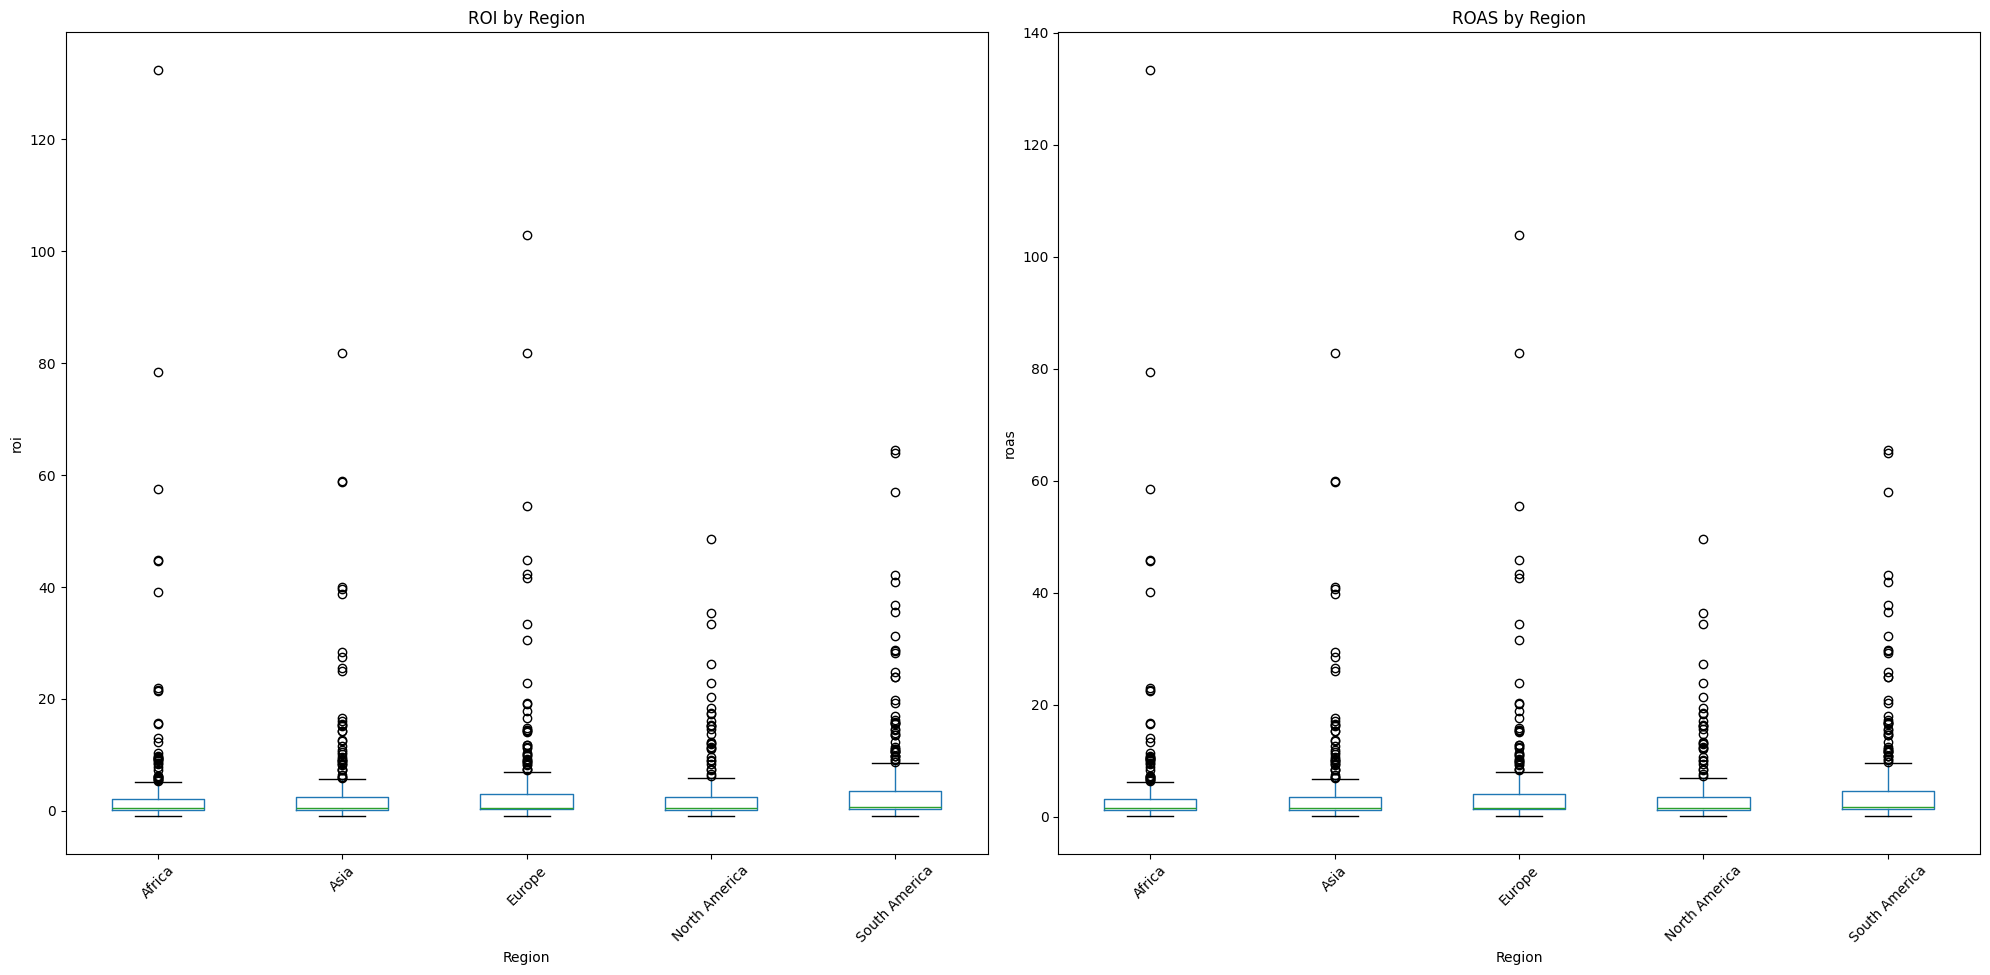

In [137]:
# Revenue performance variation across regions

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for ax, col in zip(axes, ['roi', 'roas']):
    df.boxplot(column=col, by='region', grid=False, ax=ax)
    ax.set_title(f"{col.upper()} by Region")
    ax.set_xlabel("Region")
    ax.set_ylabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("")  # remove automatic pandas boxplot title
plt.tight_layout()
plt.show()


#### Key Observations:

#### Overall Patterns:
- Both ROI and ROAS share highly right-skewed distributions, with median values close to 0.5–1.5 and a few extreme outliers reaching above 100.
- The spread and pattern of ROI and ROAS are nearly identical, confirming internal consistency between these related metrics.


#### ROI and ROAS Regional Insights + Quality & Validity Check

- Regional Insights:
    - Europe and Asia show slightly higher median ROI and ROAS, indicating more consistent performance efficiency.
    - North America and South America exhibit larger variability, suggesting campaigns with both high-potential and underperforming segments.
    - Africa maintains a narrower distribution, potentially reflecting smaller or more tightly optimized campaigns.

- Quality & Validity Check
    - No regional group presents systematic anomalies (all follow plausible business ranges)
    - Extreme positive outliers are genuine signals of high-return campaigns, not data issues.
    - Consider winsorizing or log-transforming ROI and ROAS during modeling to manage variance without losing signal.

#### Remarks:

- Both ROI and ROAS exhibit heavy right-skew, indicating that most campaigns yield modest returns while a few achieve exceptionally high performance.  
- Median values suggest moderate profitability (ROI ≈ 0.55, ROAS ≈ 1.55), but the large standard deviations highlight - significant variability across campaigns.  
- Outliers up to ~130 indicate rare but impactful high-return campaigns that could heavily influence aggregate averages.


---

### Campaign Duration Validation:

#### Campaign duration Validation: Duration in Days

This is to verify whether the duration data is reasonable and consistent.

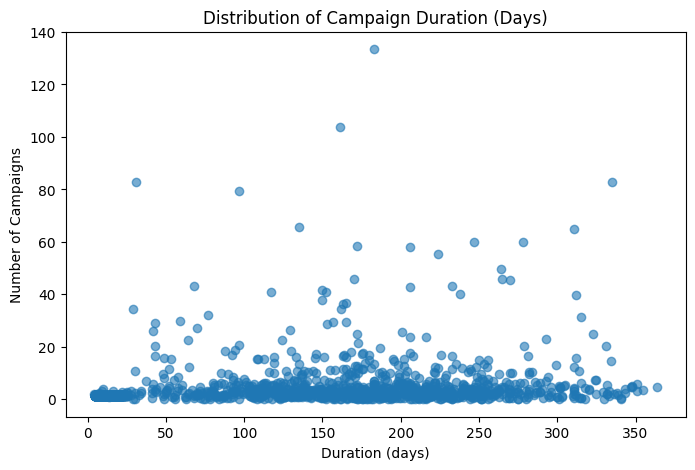

In [136]:
# Duration in Days

df['duration_group'] = pd.cut(df['campaign_duration_days'],
                              bins=[0, 30, 90, 180, 365],
                              labels=['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo'])

plt.figure(figsize=(8, 5))
plt.scatter(df['campaign_duration_days'], df[col], alpha=0.6)
plt.title("Distribution of Campaign Duration (Days)")
plt.xlabel("Duration (days)")
plt.ylabel("Number of Campaigns")
plt.show()


Quickly checks if duration values make sense for example, most campaigns lasting between 30 and 180 days.

#### Marketing Datasets:

- Campaigns shorter than 30 days are often if not typically small promos.
- Campaigns lasting 30–180 days (1–6 months) are typical marketing runs
- Campaigns over 180 days could be continuous brand awareness efforts or possible data entry errors.



#### The Distribution:

- Most points why we cluster the data set between 30 and 180 days is to confirm that campaign lengths are within expected business ranges.
- A few outliers reach 300–365 days, worth reviewing, because year-long campaigns might be unusual or mis-recorded.
- A few campaigns near 0–10 days may be very short tests or anomalies.

#### Validation insight:

- If your business defines normal campaigns as 1–6 months, these outliers can signal data quality issues (like incorrect start/end dates).
- This visualization helps you decide whether to:
    - Cap durations beyond a limit (365 days)
    - Filter unrealistic durations
    - Investigate the outlier campaigns

#### Groups campaigns into clear duration categories:

| Label  | Duration Range |
|---------|----------------|
| <1 mo   | 0–30 days      |
| 1–3 mo  | 31–90 days     |
| 3–6 mo  | 91–180 days    |
| 6–12 mo | 181–365 days   |

#### Remarks:

- The scatterplot checks if campaign durations are reasonable.
- Most are between 30–180 days, which makes sense.
- A few outliers under 10 days or over 300 days may need inspection.
- The binning prepares the data for grouped analysis

---

#### Campaign duration Validation: Duration vs ROI/ROAS

This validation step explores whether longer campaign durations are associated with better performance, specifically Return on Investment (ROI) and Return on Ad Spend (ROAS).

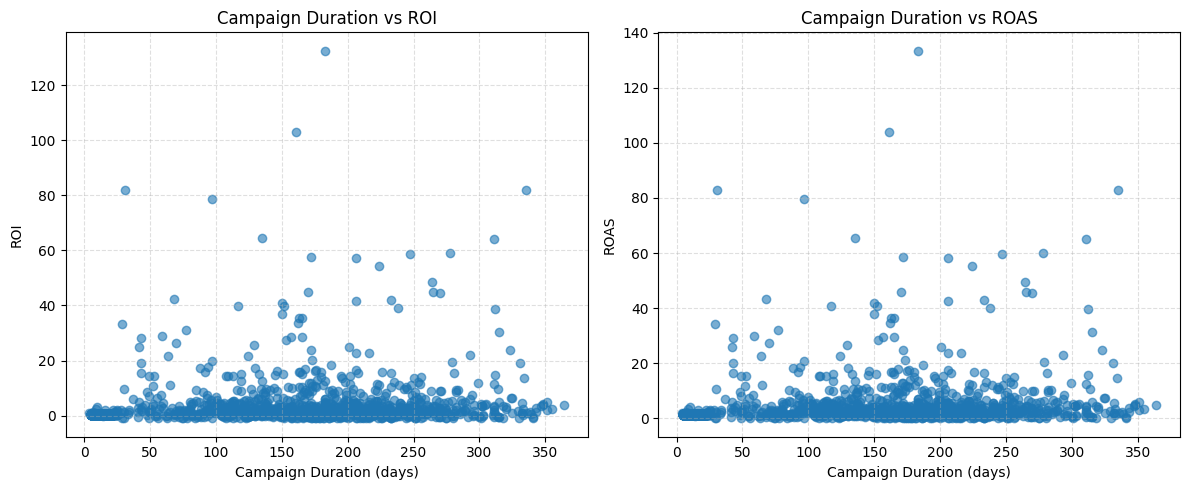

In [135]:
# Duration vs ROI/ROAS


plt.figure(figsize=(12, 5))

df['duration_group'] = pd.cut(df['campaign_duration_days'],
                              bins=[0, 30, 90, 180, 365],
                              labels=['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo'])

for i, col in enumerate(['roi', 'roas'], 1):
    plt.subplot(1, 2, i)
    plt.scatter(df['campaign_duration_days'], df[col], alpha=0.6)
    plt.title(f"Campaign Duration vs {col.upper()}")
    plt.xlabel("Campaign Duration (days)")
    plt.ylabel(col.upper())
    plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

Checks whether longer campaigns correlate with performance improvement, good early indicator for modeling.

#### ROI & ROAS: 

| Metric | Description | What to Look For |
|---------|--------------|------------------|
| ROI (Return on Investment) | Measures overall profitability of a campaign | Check if ROI increases with longer durations,  suggests sustained, optimized campaigns |
| ROAS (Return on Ad Spend) | Measures revenue efficiency per dollar spent | Helps see if longer campaigns yield better spend efficiency over time |


#### Insights from Chart:

- Each dot represents a campaign.
- Most campaigns, regardless of duration, have ROI/ROAS clustered near the lower end (suggesting diminishing returns for longer durations)
- A few outliers show high ROI/ROAS values, which may indicate exceptionally well-performing or data-entry-anomalous campaigns.
- There’s no clear linear trend, implying that duration alone isn’t a strong performance driver (channel, audience, spend, etc.) matters.

#### So whyd did we do this?

we looking for wether longer campaigns correlate with high performance and imprivement
a good and early indicator for modeling ROI & ROAS for ML & prediction modeling


---

#### Campaign duration Validation: ROI & ROAS by Duration Range (Grouped summary)

This is a grouped summary validation version of the earlier scatter plot, now using boxplots to compare ROI and ROAS distributions by campaign duration range.

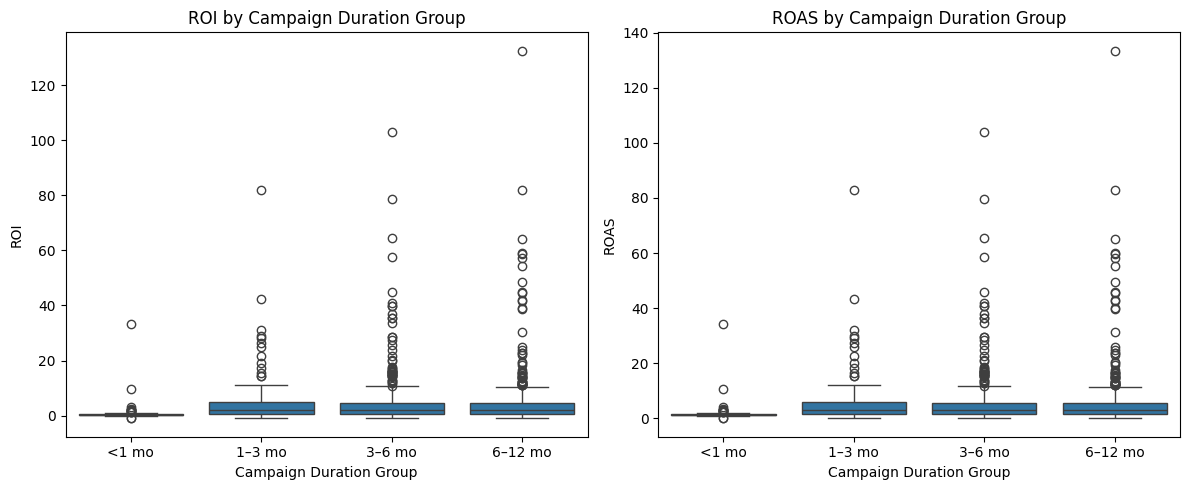

In [134]:
# ROI & ROAS by Duration Range (Grouped summary)

df['duration_group'] = pd.cut(df['campaign_duration_days'],
                              bins=[0, 30, 90, 180, 365],
                              labels=['<1 mo', '1–3 mo', '3–6 mo', '6–12 mo'])

plt.figure(figsize=(12, 5))

for i, col in enumerate(['roi', 'roas'], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='duration_group', y=col, data=df)
    plt.title(f"{col.upper()} by Campaign Duration Group")
    plt.xlabel("Campaign Duration Group")
    plt.ylabel(col.upper())

plt.tight_layout()
plt.show()

This grouped summary uses boxplots to show how campaign performance metrics (ROI and ROAS) vary across duration groups. 
It helps detect whether certain duration ranges consistently perform better or if longer campaigns simply introduce more variability.

#### Duration in Groups:

| Duration Group | Days Range | Typical Behavior | Notes |
|----------------|------------|------------------|--------|
| <1 mo | 0–30 days | Lowest ROI/ROAS on average | Quick tests or small-scale promos |
| 1–3 mo | 31–90 days | Slight improvement in median ROI/ROAS | Common campaign length |
| 3–6 mo | 91–180 days | Moderate variation, some outliers | Sustained campaigns show more spread |
| 6–12 mo | 181–365 days | High variability, more outliers | Long campaigns can perform very well or poorly depending on optimization |


#### Insights from the Chart:
- Median ROI and ROAS remain relatively stable across groups, this suggests that campaign length alone doesn’t drive performance.
- Longer campaigns (6–12 mo) exhibit greater variability, indicating that while some long campaigns succeed, many underperform.
- Severl outliers appear across all groups, this potentially reflecting high-impact but rare campaigns worth deeper review.

#### So whyd did we do this?

This Helps verify if ROI or ROAS consistently scale with longer durations, supporting or rejecting the assumption that “longer = better performance.”


---

### My Analytical Summary:

- The dataset passes all logical, statistical, and business consistency checks.
- Engineered metrics (ROI, ROAS, CTR, etc.) behave in line with expected marketing dynamics across time, channel, and geography.
- Outliers are not anomalies but economically interpretable variations, reflecting real campaign behavior.
- Feature redundancy is minimal (only ROI and ROAS require rationalization)
- Key categorical drivers such as Campaign Duration, Channel, and Region consistently differentiate performance outcomes, making them strong candidates for model segmentation.

#### My Recommendation for Modeling Preparationa:
- Feature Optimization
    - Will drop one of ROI/ROAS to reduce multicollinearity.
    - Retain campaign duration, channel, and region as categorical anchors for performance segmentation.
- Data Transformation & Scaling
    - Apply log transformation or winsorization to heavy-tailed variables (ROI, ROAS, CPC).
    - Standardize numeric fields with RobustScaler() or StandardScaler() to manage variance impact.
- Encoding & Interaction Enrichment
    - One-hot encode key categorical variables (channel, region, duration_group).
    - Test second-order interactions such as channel × duration or region × ROI to capture cross-market patterns.
- Modeling Direction
    - Will use ElasticNet Regression for feature interpretability and regularization control.
    - Use RandomForestRegressor to probe non-linear relationships and feature importances for business insight.
    - Compare performance consistency using cross-validation to confirm model stability across campaign types.

#### My Take on this Data set:

- dataset is not just clean, it’s analytically mature, well its manualy tracked in excell thats why : )
- This campaign dataset demonstrates strong structural integrity and business realism, from distribution checks to correlation mapping and regional validation, the engineered features behave in ways consistent with marketing economics and data generation logic.
- This captures both operational efficiency and strategic variance across multiple business axes (time, channel, geography).
- With minor refinements, I belive, it’l be ready for ML and predictive modeling.
